# Занятие 12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([3, 3, 3, ..., 2, 2, 3])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1728 1664 1656 1612 1637 1703]
[0.1728 0.1664 0.1656 0.1612 0.1637 0.1703]
[1 2 3 4 5 6]
1.0


In [5]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 3 4 5 6]
10: [0.2 0.2 0.1 0.1 0.3 0.1] 0.9999999999999999
[1 2 3 4 5 6]
100: [0.23 0.18 0.2  0.12 0.11 0.16] 1.0
[1 2 3 4 5 6]
1000: [0.17  0.169 0.155 0.185 0.147 0.174] 1.0
[1 2 3 4 5 6]
10000: [0.1631 0.1628 0.1635 0.1661 0.176  0.1685] 0.9999999999999999
[1 2 3 4 5 6]
100000: [0.16559 0.16823 0.16647 0.16717 0.16698 0.16556] 1.0


In [6]:
1/6

0.16666666666666666

### Непрерывное

In [21]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
#sample

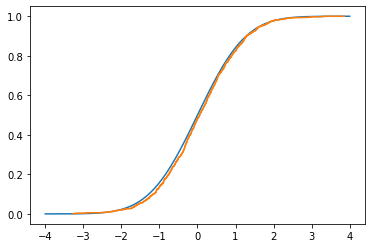

In [22]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 3.  1.  7.  9. 12. 18. 20. 11. 14.  0.  2.  3.]


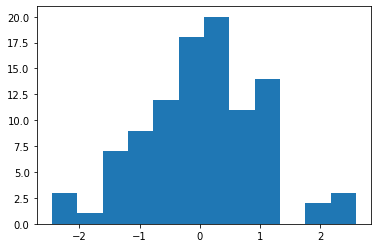

In [18]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, )
print(b)

In [19]:
len(n)

13

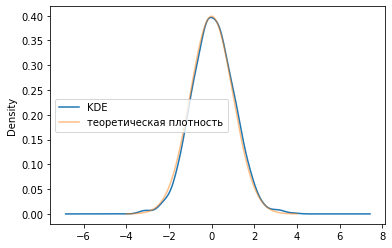

In [23]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [24]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-8.71153251e-01,  5.08008659e-01,  1.04457140e+00, -8.46267731e-01,
       -1.36215827e+00,  6.06681521e-02,  1.03971230e-02,  1.42659371e+00,
        2.97285462e-01,  1.38562627e+00,  3.60877619e-03, -5.58728247e-01,
       -1.47259688e+00,  1.22831380e-01,  1.37477136e+00,  4.87882222e-01,
        1.16295298e+00,  1.22316465e+00,  1.11352025e+00,  1.58322386e+00,
       -4.65976905e-01, -3.67630364e-01, -4.62554250e-01,  1.05395833e+00,
        2.00341734e+00,  6.14825249e-01,  4.09119574e-01,  1.07060832e+00,
        8.25495724e-01,  6.61985578e-01, -6.16665684e-01,  3.63448621e-01,
       -2.03561810e-03, -1.00445242e-01,  1.27319813e-01,  1.24999582e+00,
       -7.03208885e-01,  1.28551170e+00,  1.59027441e+00,  1.33859736e-01,
        1.70347322e-01, -8.61145993e-01,  2.03024051e+00, -3.71259009e-01,
        2.66507581e+00, -5.25879063e-01, -7.55443751e-01, -3.20170869e-01,
        6.58752352e-01, -7.34381266e-01,  1.08938588e+00, -8.11492673e-01,
        4.88438831e-02,  

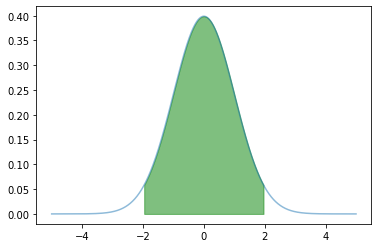

In [25]:
x = np.linspace(-5,5,10000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [28]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [29]:
norm_rv.ppf(0.5)

0.0

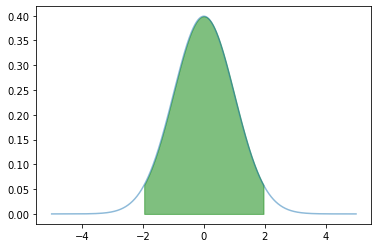

In [30]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

In [32]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 7
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 100000]
alpha = .05
for n in N:
    samples = np.linspace(-1, 11, n)
    pdf = norm_rv.pdf(samples)
    qa = norm_rv.pdf(alpha/2)
    qb = norm_rv.pdf(1-alpha/2)
    print ("Для N=%.f ДИ %.4f ... %.4f" % (n, samples[np.argmax(pdf)]-qa*np.sqrt(sigma/n), samples[np.argmax(pdf)]+qb*np.sqrt(sigma/n)))

Для N=10 ДИ 4.2963 ... 4.3738
Для N=50 ДИ 4.8610 ... 4.8956
Для N=100 ДИ 4.9277 ... 4.9522
Для N=100000 ДИ 4.9996 ... 5.0003


Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [33]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([2.40735847, 1.29951185, 1.48811949, 2.29418411, 2.8258891 ,
       3.21070101, 3.27678197, 3.68804935, 3.10597096, 1.28026916])

In [34]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.00931135, 0.        , 0.        , 0.        , 0.        ,
        0.02793406, 0.01862271, 0.01862271, 0.02793406, 0.04655677,
        0.08380218, 0.158293  , 0.12104759, 0.28865195, 0.17691571,
        0.36314277, 0.41901089, 0.72628555, 0.81008773, 1.05218291,
        1.28496674, 1.48050516, 1.82502522, 2.10436582, 2.38370642,
        2.67235836, 2.90514219, 3.65005045, 3.5196915 , 3.96663646,
        4.25528841, 4.52531765, 4.34840194, 4.42289276, 4.50669494,
        4.32977923, 4.30184517, 4.32977923, 4.17148623, 3.43588933,
        3.10068061, 3.04481249, 2.55131077, 2.27197018, 1.91813876,
        1.79709117, 1.23840997, 0.89388991, 0.82871043, 0.65179472,
        0.53074713, 0.50281307, 0.30727466, 0.22347248, 0.13035894,
        0.14898165, 0.05586812, 0.06517947, 0.03724541, 0.02793406,
        0.01862271]),
 array([2.13848453, 2.14922411, 2.15996368, 2.17070326, 2.18144284,
        2.19218242, 2.20292199, 2.21366157, 2.22440115, 2.23514073,
        2.2458803 , 2.2566

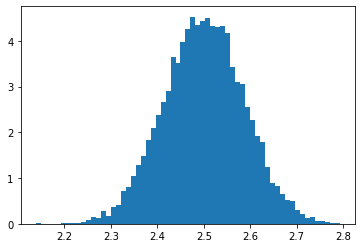

In [35]:
plt.hist(means, density=True, bins='auto')

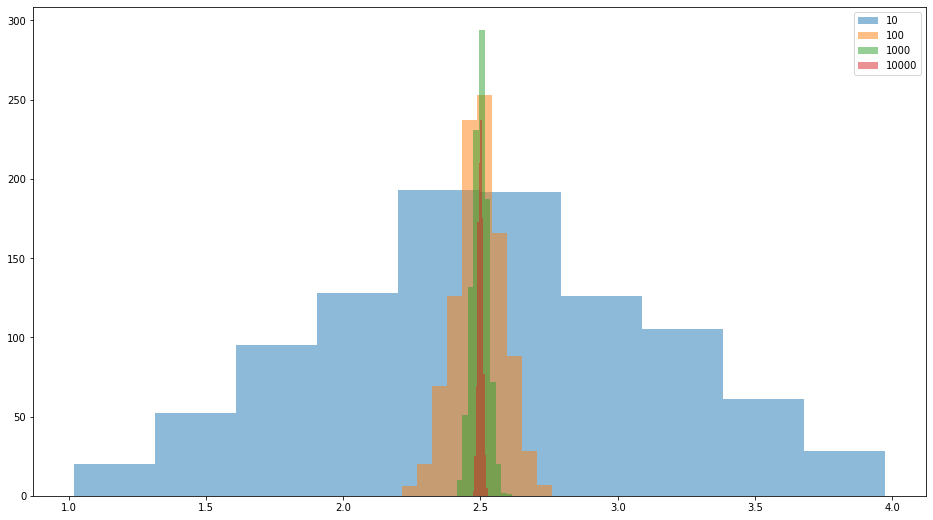

In [37]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [38]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [39]:
uniform_rv.mean()

2.5

In [40]:
uniform_rv.var()

0.75

In [41]:
uniform_rv.std()

0.8660254037844386

[]

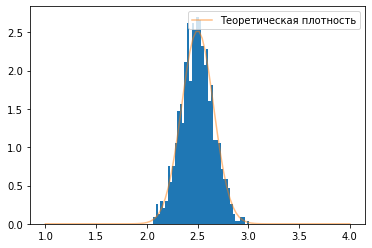

In [42]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [43]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * uniform_rv.std() / np.sqrt(N), np.mean(data) + 2 * uniform_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.3272944629500807, 2.9597499949837567] 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [44]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 7,  7,  5,  7,  7,  5, 10,  7,  6,  5])

Text(0.5, 0, '$x$')

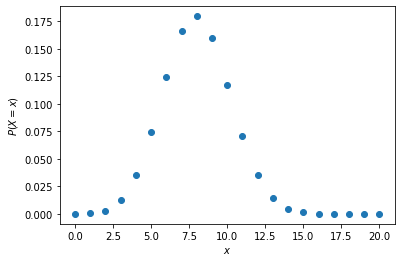

In [45]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

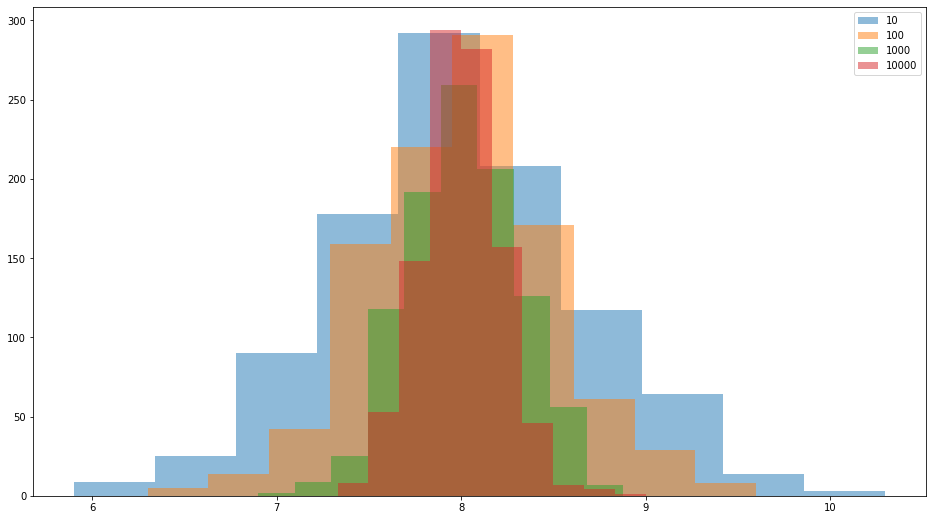

In [46]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [47]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

Text(0.5, 0, '$x$')

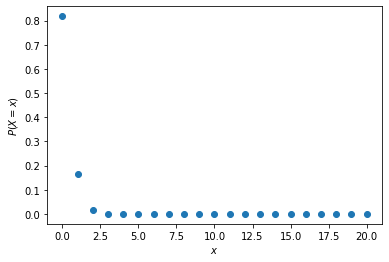

In [48]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

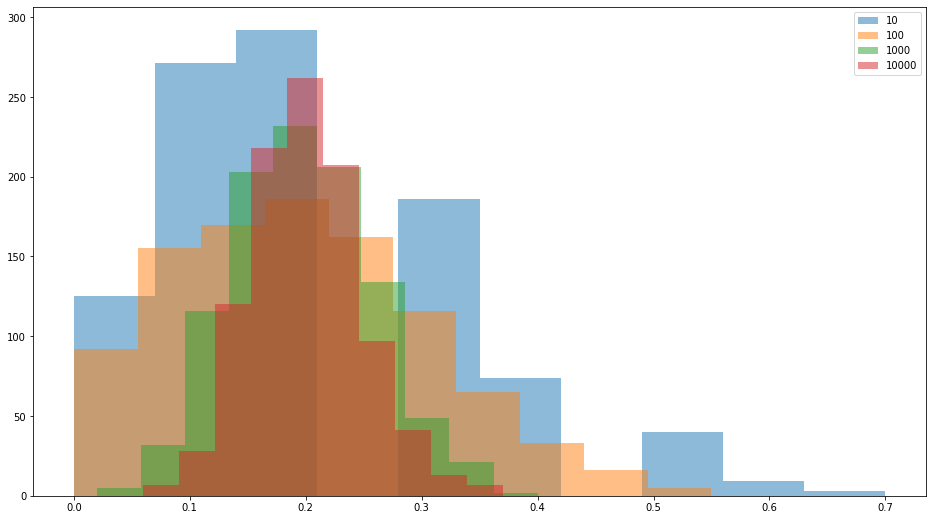

In [49]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()